Slope Coef:  [ 0.13493616  1.00496752 -0.21545991 -0.2618685   0.03795657]
Intercept:  -1.554515639021849


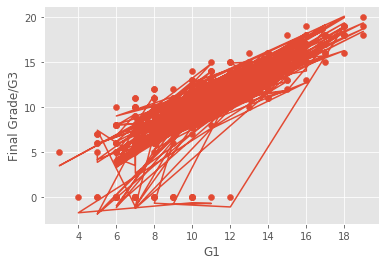

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")

data = pd.read_csv("student-mat.csv", delimiter=";")
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

predict = "G3"

x = np.array(data.drop([predict], 1)) #features
y = np.array(data[predict]) #labels
#Redefine
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
""""best_acc = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    accuracy = linear.score(x_test, y_test)
    #print("Accuracy:", accuracy)
    
    if accuracy > best_acc:
        best_acc = accuracy
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Accuracy:", best_acc) """
            
# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("Slope Coef: ", linear.coef_)
print("Intercept: ", linear.intercept_)

predictions = linear.predict(x) #Get a list of all predictions


#for i in range(len(predictions)):
#    print("Prediction:", predictions[i], "Input:", x_test[i], "Real:", y_test[i])

# Drawing and plotting model
plot = "G1"
plt.scatter(data[plot], data["G3"])
plt.plot(data[plot], predictions)
plt.xlabel(plot)
plt.ylabel("Final Grade/G3")
plt.show()

In [2]:
pd.read_csv("student-mat.csv", delimiter=";")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
x

array([[ 5,  6,  2,  0,  6],
       [ 5,  5,  2,  0,  4],
       [ 7,  8,  2,  3, 10],
       ...,
       [10,  8,  1,  3,  3],
       [11, 12,  1,  0,  0],
       [ 8,  9,  1,  0,  5]], dtype=int64)